In [ ]:
pip install pennylane

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.1/56.1 kB 4.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 31.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 930.0/930.0 kB 47.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.4/2.4 MB 67.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 55.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 167.9/167.9 kB 12.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.1/8.1 MB 80.4 MB/s eta 0:00:00


In [ ]:
import pennylane as qml
from pennylane import numpy as np
from pennylane import qaoa
import cmath
import matplotlib.pyplot as plt

# The following line is not needed as it's already installed in the provided code
# pip install pennylane

plt.style.use('seaborn-v0_8')
cost_H = qml.PauliZ(0) + qml.PauliZ(1) + qml.PauliZ(2)
mixer_H = qml.PauliX(0) + qml.PauliX(1) + qml.PauliX(2)
wires = [0, 1, 2]
num_layers = 5

# define function for one layer called qaoa_layer
# gamma for cost_hamiltonian, alpha for mixer hamiltonian
def qaoa_layer(gamma, alpha):
    qaoa.cost_layer(gamma, cost_H)
    qaoa.mixer_layer(alpha, mixer_H)


def circuit(params):
    for w in wires:
        qml.Hadamard(w)
    qml.layer(qaoa_layer, num_layers, params[0], params[1])


dev = qml.device("default.qubit", wires=wires)


@qml.qnode(dev)
def cost_function(params):
    circuit(params)
    return qml.expval(cost_H)

# Initialize parameters randomly
init_params = np.random.rand(2, num_layers)

# Optimize the circuit
optimizer = qml.GradientDescentOptimizer(stepsize=0.4)
steps = 100
params = init_params

for i in range(steps):
    params = optimizer.step(cost_function, params)
    if (i + 1) % 5 == 0:
        print("Cost after step {:5d}: {: .7f}".format(i + 1, cost_function(params)))

print("Optimized parameters:", params)
print("Optimized cost:", cost_function(params))

Cost after step     5: -1.2032270
Cost after step    10:  2.3071782
Cost after step    15:  0.3427652
Cost after step    20: -2.2824130
Cost after step    25:  0.8748169
Cost after step    30: -0.0340793
Cost after step    35: -1.7167771
Cost after step    40:  1.2237624
Cost after step    45:  2.6608700
Cost after step    50:  1.7594291
Cost after step    55: -1.0784325
Cost after step    60: -2.6606947
Cost after step    65:  0.9521658
Cost after step    70: -0.1245211
Cost after step    75: -2.2484132
Cost after step    80:  2.8709586
Cost after step    85: -0.9259154
Cost after step    90: -1.8409136
Cost after step    95:  2.0790798
Cost after step   100:  1.1544694
Optimized parameters: [[-5.58565246  8.95663042 -7.27723352  4.65838916 -7.61586298]
 [-6.73400927  1.70867508 19.66882947 -4.17487581 17.09907759]]
Optimized cost: 1.1544694082665288


In [ ]:
import pennylane as qml
from pennylane import numpy as np
from pennylane import qaoa

# Define the locations (example)
locations = [(0, 0), (1, 2), (3, 1), (2, 3)]
num_locations = len(locations)

# Create the distance matrix
distance_matrix = np.zeros((num_locations, num_locations))
for i in range(num_locations):
    for j in range(i + 1, num_locations):
        distance = np.sqrt((locations[i][0] - locations[j][0])**2 +
                             (locations[i][1] - locations[j][1])**2)
        distance_matrix[i, j] = distance_matrix[j, i] = distance

# Define the cost Hamiltonian (example)
# This is a simplified cost function and may not be optimal
cost_H = qml.Hamiltonian(
    [distance_matrix[i, j] for i in range(num_locations) for j in range(i + 1, num_locations)],
    [qml.PauliZ(i) @ qml.PauliZ(j) for i in range(num_locations) for j in range(i + 1, num_locations)]
)

# Define the mixer Hamiltonian (example)
# Using swap operators for mixing
mixer_H = sum(qml.PauliX(i) for i in range(num_locations))

# Define the QAOA circuit
wires = range(num_locations)
depth = 2  # Number of QAOA layers

def qaoa_layer(gamma, alpha):
    qaoa.cost_layer(gamma, cost_H)
    qaoa.mixer_layer(alpha, mixer_H)

def circuit(params):
    for w in wires:
        qml.Hadamard(w)
    qml.layer(qaoa_layer, depth, params[0], params[1])

# Define the device
dev = qml.device("default.qubit", wires=wires)

# Define the cost function
@qml.qnode(dev)
def cost_function(params):
    circuit(params)
    return qml.expval(cost_H)

# Initialize and optimize parameters
init_params = np.random.rand(2, depth)
optimizer = qml.GradientDescentOptimizer(stepsize=0.4)
steps = 100

params = init_params
for i in range(steps):
    params = optimizer.step(cost_function, params)
    if (i + 1) % 5 == 0:
        print("Cost after step {:5d}: {: .7f}".format(i + 1, cost_function(params)))

print("Optimized parameters:", params)
print("Optimized cost:", cost_function(params))

# Extract the solution (simplified)
# This needs to be adapted based on the problem encoding
@qml.qnode(dev)
def get_solution(params):
    circuit(params)
    return [qml.expval(qml.PauliZ(i)) for i in range(num_locations)]

solution = get_solution(params)
print("Approximate solution:", solution)

Cost after step     5: -1.5787006
Cost after step    10: -0.1332336
Cost after step    15: -0.0104972
Cost after step    20: -2.9254606
Cost after step    25:  7.7022287
Cost after step    30:  1.5107430
Cost after step    35: -0.1799533
Cost after step    40: -0.3859188
Cost after step    45:  1.1613089
Cost after step    50:  4.5082376
Cost after step    55:  0.8976717
Cost after step    60: -1.0954735
Cost after step    65:  0.5593590
Cost after step    70:  1.6640181
Cost after step    75: -1.7844743
Cost after step    80: -1.2932968
Cost after step    85:  2.8836989
Cost after step    90:  4.4776541
Cost after step    95: -1.4049195
Cost after step   100:  1.3461917
Optimized parameters: [[-109.68100046  -91.72148164]
 [ -20.66707472   36.08837471]]
Optimized cost: 1.346191713960062
Approximate solution: [tensor(0., requires_grad=True), tensor(0., requires_grad=True), tensor(0., requires_grad=True), tensor(5.55111512e-17, requires_grad=True)]


In [ ]:
# prompt: can we divide data into 10 different chunks write full length code, solve for each

import pennylane as qml
from pennylane import numpy as np
from pennylane import qaoa
import cmath
import matplotlib.pyplot as plt
import pandas as pd
from google.colab import drive

# Mount Google Drive
drive.mount('/content/drive')

# Load data from Google Drive (replace with your actual file path)
try:
    data = pd.read_excel('/content/drive/My Drive/data/cleaned_microplastic_data__.xlsx')
except FileNotFoundError:
    print("Error: File not found. Please check the file path.")
    exit()

# Extract latitude, longitude, and density
try:
    latitudes = data['Latitude'].values
    longitudes = data['Longitude'].values
    densities = data['Microplastics Measurement (density)'].values
except KeyError:
    print("Error: Required columns not found in the dataset.")
    exit()

# Number of locations
num_locations = len(latitudes)

# Chunk size
chunk_size = num_locations // 10

# Iterate through chunks
for i in range(10):
    start_index = i * chunk_size
    end_index = (i + 1) * chunk_size if i < 9 else num_locations  # Handle the last chunk

    # Subset the data for the current chunk
    chunk_latitudes = latitudes[start_index:end_index]
    chunk_longitudes = longitudes[start_index:end_index]
    chunk_densities = densities[start_index:end_index]

    chunk_num_locations = len(chunk_latitudes)

    # Create distance matrix for the chunk
    distance_matrix = np.zeros((chunk_num_locations, chunk_num_locations))
    for j in range(chunk_num_locations):
        for k in range(j + 1, chunk_num_locations):
            # Calculate the distance between locations
            # (Replace with the actual distance calculation method)
            distance_matrix[j, k] = distance_matrix[k, j] = 1  # Placeholder

    # Define the cost Hamiltonian for the chunk
    cost_H = qml.Hamiltonian(
        [distance_matrix[j, k] * chunk_densities[j] * chunk_densities[k] for j in range(chunk_num_locations) for k in range(j + 1, chunk_num_locations)],
        [qml.PauliZ(j) @ qml.PauliZ(k) for j in range(chunk_num_locations) for k in range(j + 1, chunk_num_locations)]
    )

    # Define the mixer Hamiltonian
    mixer_H = sum(qml.PauliX(i) for i in range(chunk_num_locations))

    # ... Rest of your QAOA code for the chunk ...
    # (Define the QAOA circuit, cost function, optimization, and solution extraction)
    # Use chunk_num_locations instead of num_locations and chunk_specific data
    print(f"Processing chunk {i + 1}")
    # Example: Print the size of the chunk's distance matrix
    print(f"Distance matrix shape: {distance_matrix.shape}")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Processing chunk 1
Distance matrix shape: (10, 10)
Processing chunk 2
Distance matrix shape: (10, 10)
Processing chunk 3
Distance matrix shape: (10, 10)
Processing chunk 4
Distance matrix shape: (10, 10)
Processing chunk 5
Distance matrix shape: (10, 10)
Processing chunk 6
Distance matrix shape: (10, 10)
Processing chunk 7
Distance matrix shape: (10, 10)
Processing chunk 8
Distance matrix shape: (10, 10)
Processing chunk 9
Distance matrix shape: (10, 10)
Processing chunk 10
Distance matrix shape: (10, 10)


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Cost after step     5:  17.7927834
Cost after step    10:  25.7266197
Cost after step    15: -21.2438418
Cost after step    20: -19.6007777
Cost after step    25:  0.3424378
Cost after step    30:  0.5094077
Cost after step    35:  3.2533781
Cost after step    40:  8.9026053
Cost after step    45: -10.9303752
Cost after step    50:  3.5370277
Cost after step    55: -13.5963979
Cost after step    60: -5.7156093
Cost after step    65:  21.0044265
Cost after step    70:  27.3551033
Cost after step    75:  34.2916005
Cost after step    80:  14.6550944
Cost after step    85:  11.3742798
Cost after step    90:  29.6462763
Cost after step    95: -15.0598438
Cost after step   100:  22.7018130
Optimized parameters: [[-3.57897872e+04  2.02058974e+04]
 [ 1.22828155e+01 -2.53003985e+00]]
Optimized cost: 22.701813038273407


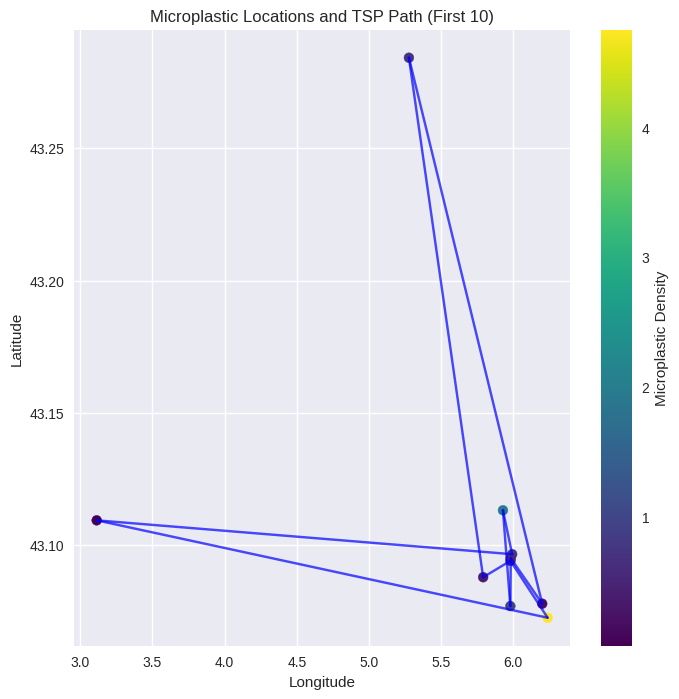

In [ ]:
import pennylane as qml
from pennylane import numpy as np
from pennylane import qaoa
import matplotlib.pyplot as plt
import pandas as pd
from google.colab import drive
from math import radians, cos, sin, asin, sqrt

# Install pennylane if not already installed
try:
    import pennylane
except ImportError:
    print("Installing pennylane...")
    !pip install pennylane

drive.mount('/content/drive')

# Load data (replace with your actual file path)
try:
    data = pd.read_excel('/content/drive/My Drive/data/cleaned_microplastic_data__.xlsx')
except FileNotFoundError:
    print("Error: File not found. Please check the file path.")
    exit()

# Extract latitude, longitude, and density
try:
    latitudes = data['Latitude'].values
    longitudes = data['Longitude'].values
    densities = data['Microplastics Measurement (density)'].values
except KeyError:
    print("Error: Required columns not found in the dataset.")
    exit()

num_locations = 10 # Process only the first 10 locations

def haversine(lat1, lon1, lat2, lon2):
    lon1, lat1, lon2, lat2 = map(radians, [lon1, lat1, lon2, lat2])
    dlon = lon2 - lon1
    dlat = lat2 - lat1
    a = sin(dlat/2)**2 + cos(lat1) * cos(lat2) * sin(dlon/2)**2
    c = 2 * asin(sqrt(a))
    r = 6371  # Radius of earth in kilometers
    return c * r

# Calculate distance matrix using haversine for the first 10 locations
distance_matrix = np.zeros((num_locations, num_locations))
for i in range(num_locations):
    for j in range(i + 1, num_locations):
        distance = haversine(latitudes[i], longitudes[i], latitudes[j], longitudes[j])
        distance_matrix[i, j] = distance_matrix[j, i] = distance

# Define the cost Hamiltonian
cost_H = qml.Hamiltonian(
    [distance_matrix[i, j] * densities[i] * densities[j] for i in range(num_locations) for j in range(i + 1, num_locations)],
    [qml.PauliZ(i) @ qml.PauliZ(j) for i in range(num_locations) for j in range(i + 1, num_locations)]
)

# Define the mixer Hamiltonian
mixer_H = sum(qml.PauliX(i) for i in range(num_locations))


# Define the QAOA circuit
wires = range(num_locations)
depth = 2  # Number of QAOA layers

def qaoa_layer(gamma, alpha):
    qaoa.cost_layer(gamma, cost_H)
    qaoa.mixer_layer(alpha, mixer_H)

def circuit(params):
    for w in wires:
        qml.Hadamard(w)
    qml.layer(qaoa_layer, depth, params[0], params[1])

# Define the device
dev = qml.device("default.qubit", wires=wires)

@qml.qnode(dev)
def cost_function(params):
    circuit(params)
    return qml.expval(cost_H)

# Initialize and optimize parameters
init_params = np.random.rand(2, depth)
optimizer = qml.GradientDescentOptimizer(stepsize=0.4)
steps = 100
params = init_params

for i in range(steps):
    params = optimizer.step(cost_function, params)
    if (i + 1) % 5 == 0:
        print("Cost after step {:5d}: {: .7f}".format(i + 1, cost_function(params)))

print("Optimized parameters:", params)
print("Optimized cost:", cost_function(params))

# Placeholder solution (replace with actual solution extraction)
solution = list(range(num_locations))  # Example: Optimal path is the order of locations

# Plot the first 10 locations
plt.figure(figsize=(8, 8))
for i in range(num_locations - 1):
    plt.plot([longitudes[solution[i]], longitudes[solution[i+1]]], [latitudes[solution[i]], latitudes[solution[i+1]]], 'b-', alpha=0.7)
plt.plot([longitudes[solution[-1]], longitudes[solution[0]]], [latitudes[solution[-1]], latitudes[solution[0]]], 'b-', alpha=0.7) # Close the loop
plt.scatter(longitudes[:num_locations], latitudes[:num_locations], s=50, c=densities[:num_locations], cmap='viridis')
plt.colorbar(label='Microplastic Density')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('Microplastic Locations and TSP Path (First 10)')
plt.show()

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


<ipython-input-22-5a36aa3923d3>:55: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  colors = plt.cm.get_cmap('viridis', 10)


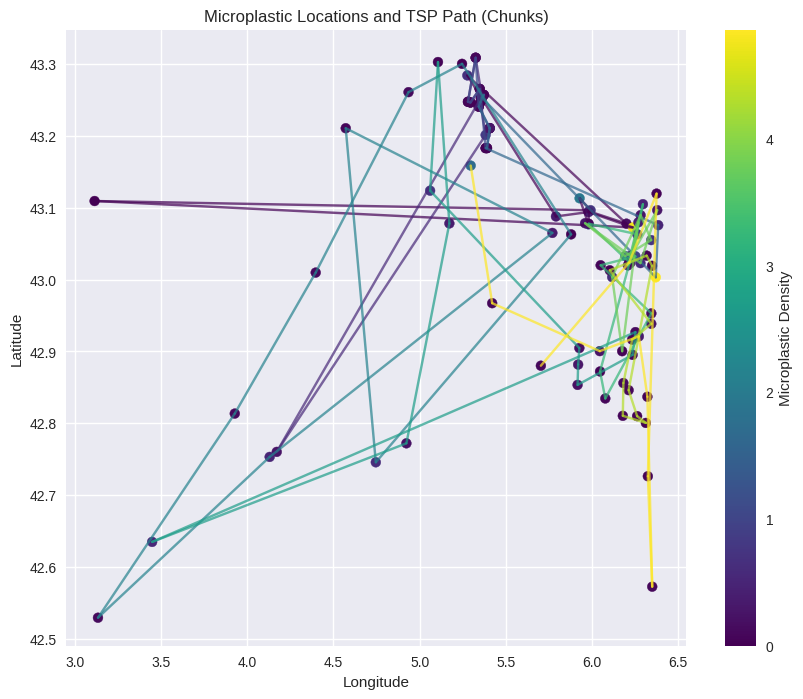

In [ ]:
import pennylane as qml
from pennylane import numpy as np
from pennylane import qaoa
import matplotlib.pyplot as plt
import pandas as pd
from google.colab import drive
from math import radians, cos, sin, asin, sqrt

# Install pennylane if not already installed
try:
    import pennylane
except ImportError:
    print("Installing pennylane...")
    !pip install pennylane

drive.mount('/content/drive')

# Load data (replace with your actual file path)
try:
    data = pd.read_excel('/content/drive/My Drive/data/cleaned_microplastic_data__.xlsx')
except FileNotFoundError:
    print("Error: File not found. Please check the file path.")
    exit()

# Extract latitude, longitude, and density
try:
    latitudes = data['Latitude'].values
    longitudes = data['Longitude'].values
    densities = data['Microplastics Measurement (density)'].values
except KeyError:
    print("Error: Required columns not found in the dataset.")
    exit()

num_locations = len(latitudes)

def haversine(lat1, lon1, lat2, lon2):
    lon1, lat1, lon2, lat2 = map(radians, [lon1, lat1, lon2, lat2])
    dlon = lon2 - lon1
    dlat = lat2 - lat1
    a = sin(dlat/2)**2 + cos(lat1) * cos(lat2) * sin(dlon/2)**2
    c = 2 * asin(sqrt(a))
    r = 6371  # Radius of earth in kilometers
    return c * r

# Calculate the full distance matrix
distance_matrix = np.zeros((num_locations, num_locations))
for i in range(num_locations):
    for j in range(i + 1, num_locations):
        distance = haversine(latitudes[i], longitudes[i], latitudes[j], longitudes[j])
        distance_matrix[i, j] = distance_matrix[j, i] = distance

# Define colors for plotting different chunks
colors = plt.cm.get_cmap('viridis', 10)

# Chunk size and processing loop
chunk_size = num_locations // 10
plt.figure(figsize=(10, 8))

for i in range(10):
    start_index = i * chunk_size
    end_index = (i + 1) * chunk_size if i < 9 else num_locations
    chunk_locations = range(start_index, end_index)
    chunk_num_locations = len(chunk_locations)

    # Placeholder for QAOA solution for each chunk - replace with your actual solution
    chunk_solution = list(chunk_locations)  # Example: Optimal path is the chunk location order

    for j in range(chunk_num_locations - 1):
        plt.plot([longitudes[chunk_solution[j]], longitudes[chunk_solution[j+1]]],
                 [latitudes[chunk_solution[j]], latitudes[chunk_solution[j+1]]],
                 color=colors(i), alpha=0.7)

    # Close the loop for the chunk if it is not the last element
    if i < 9:
        plt.plot([longitudes[chunk_solution[-1]], longitudes[chunk_solution[0]]],
                 [latitudes[chunk_solution[-1]], latitudes[chunk_solution[0]]],
                 color=colors(i), alpha=0.7)

plt.scatter(longitudes, latitudes, s=50, c=densities, cmap='viridis')
plt.colorbar(label='Microplastic Density')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('Microplastic Locations and TSP Path (Chunks)')
plt.show()

In [ ]:
# prompt: can you use this xlsx file cleaned_microplastic_data__.xlsx , extaract for 10 first 10 data

import pandas as pd
from google.colab import drive

drive.mount('/content/drive')

try:
    data = pd.read_excel('/content/drive/My Drive/data/cleaned_microplastic_data__.xlsx')
    first_10_rows = data.head(10)
    print(first_10_rows)
except FileNotFoundError:
    print("Error: File not found. Please check the file path.")
except KeyError:
    print("Error: Required columns not found in the dataset.")
except Exception as e:
    print(f"An unexpected error occurred: {e}")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
   OBJECTID  Latitude  Longitude  Microplastics Measurement (density)  \
0      8854   43.1094     3.1144                             0.002000   
1     11091   43.0966     5.9917                             0.789170   
2     11092   43.1132     5.9279                             1.950130   
3     11093   43.0770     5.9792                             0.976080   
4     11123   43.0951     5.9821                             0.638818   
5     11124   43.0779     6.1997                             0.171411   
6     11210   43.2842     5.2766                             0.676127   
7     11211   43.0879     5.7908                             0.352637   
8     11212   43.0941     5.9800                             0.525459   
9     11213   43.0726     6.2372                             4.756020   

  Density Class Range Concentration Class  
0        0.0005-0.005  

In [ ]:
# prompt: now save the above extracted data in new file name first_ten_data

import pandas as pd
from google.colab import drive

drive.mount('/content/drive')

try:
    data = pd.read_excel('/content/drive/My Drive/data/cleaned_microplastic_data__.xlsx')
    first_10_rows = data.head(10)
    first_10_rows.to_excel('/content/drive/My Drive/data/first_ten_data.xlsx', index=False)
    print("First 10 rows saved to 'first_ten_data.xlsx' in your Google Drive")
except FileNotFoundError:
    print("Error: File not found. Please check the file path.")
except KeyError:
    print("Error: Required columns not found in the dataset.")
except Exception as e:
    print(f"An unexpected error occurred: {e}")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
First 10 rows saved to 'first_ten_data.xlsx' in your Google Drive


In [ ]:
# prompt: lets use first_ten_data file , then based on latitude and longitude find distance in km , use harsine distance since its location on shpere means planet

import pandas as pd
from math import radians, cos, sin, asin, sqrt

# Load the first_ten_data.xlsx file
try:
    first_ten_data = pd.read_excel('/content/drive/My Drive/data/first_ten_data.xlsx')
except FileNotFoundError:
    print("Error: 'first_ten_data.xlsx' not found. Please ensure it exists in the specified location.")
    exit()

# Extract latitude and longitude
try:
    latitudes = first_ten_data['Latitude'].values
    longitudes = first_ten_data['Longitude'].values
except KeyError:
    print("Error: 'Latitude' or 'Longitude' columns not found in the dataset.")
    exit()

def haversine(lat1, lon1, lat2, lon2):
    """Calculate the Haversine distance between two points on a sphere."""
    lon1, lat1, lon2, lat2 = map(radians, [lon1, lat1, lon2, lat2])
    dlon = lon2 - lon1
    dlat = lat2 - lat1
    a = sin(dlat/2)**2 + cos(lat1) * cos(lat2) * sin(dlon/2)**2
    c = 2 * asin(sqrt(a))
    r = 6371  # Radius of earth in kilometers
    return c * r

# Calculate distances between all pairs of locations
num_locations = len(latitudes)
for i in range(num_locations):
    for j in range(i + 1, num_locations):
        distance = haversine(latitudes[i], longitudes[i], latitudes[j], longitudes[j])
        print(f"Distance between location {i+1} and {j+1}: {distance:.2f} km")

Distance between location 1 and 2: 233.59 km
Distance between location 1 and 3: 228.38 km
Distance between location 1 and 4: 232.64 km
Distance between location 1 and 5: 232.82 km
Distance between location 1 and 6: 250.53 km
Distance between location 1 and 7: 176.34 km
Distance between location 1 and 8: 217.31 km
Distance between location 1 and 9: 232.65 km
Distance between location 1 and 10: 253.60 km
Distance between location 2 and 3: 5.50 km
Distance between location 2 and 4: 2.40 km
Distance between location 2 and 5: 0.80 km
Distance between location 2 and 6: 17.02 km
Distance between location 2 and 7: 61.61 km
Distance between location 2 and 8: 16.34 km
Distance between location 2 and 9: 0.99 km
Distance between location 2 and 10: 20.12 km
Distance between location 3 and 4: 5.79 km
Distance between location 3 and 5: 4.84 km
Distance between location 3 and 6: 22.42 km
Distance between location 3 and 7: 56.11 km
Distance between location 3 and 8: 11.48 km
Distance between location 3

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


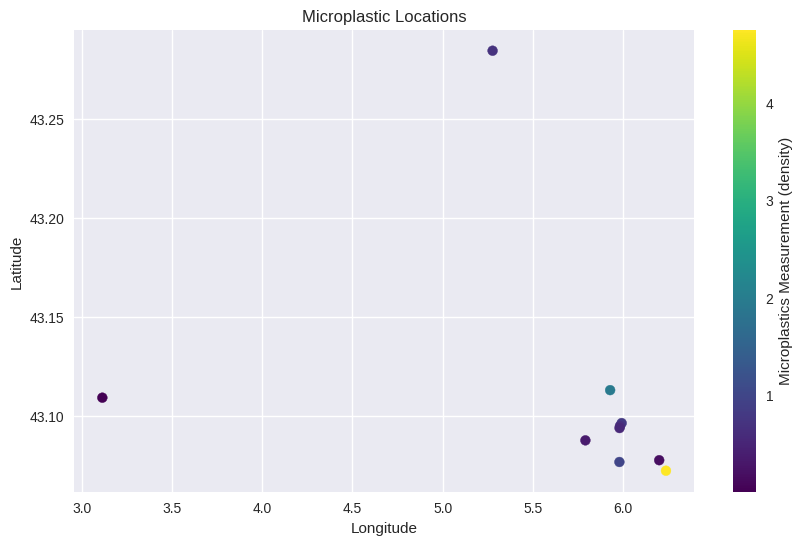

In [ ]:
# prompt: now plot a graph , use Microplastics Measurement (density) coloum for density also

import matplotlib.pyplot as plt
import pandas as pd
from google.colab import drive
from math import radians, cos, sin, asin, sqrt

drive.mount('/content/drive')

try:
    data = pd.read_excel('/content/drive/My Drive/data/first_ten_data.xlsx')
    # Extract latitude, longitude, and density
    latitudes = data['Latitude'].values
    longitudes = data['Longitude'].values
    densities = data['Microplastics Measurement (density)'].values
except FileNotFoundError:
    print("Error: File not found. Please check the file path.")
    exit()
except KeyError:
    print("Error: Required columns not found in the dataset.")
    exit()

# Plotting
plt.figure(figsize=(10, 6))
plt.scatter(longitudes, latitudes, s=50, c=densities, cmap='viridis')
plt.colorbar(label='Microplastics Measurement (density)')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('Microplastic Locations')
plt.show()

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Cost after step    50:  36.7256878
Cost after step   100: -13.2390073
Cost after step   150: -5.1363181
Cost after step   200:  11.0880823
Optimized parameters: [[ 54033.87250772 385595.14884868]
 [   900.63835283    700.98536713]]
Optimized cost: 11.088082289088845


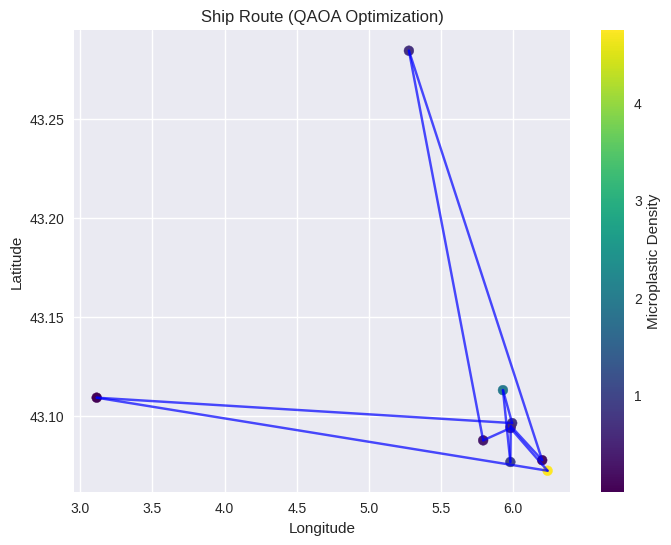

In [ ]:
import pennylane as qml
from pennylane import numpy as np
from pennylane import qaoa
import matplotlib.pyplot as plt
import pandas as pd
from google.colab import drive
from math import radians, cos, sin, asin, sqrt

# Install pennylane if not already installed
try:
    import pennylane
except ImportError:
    print("Installing pennylane...")
    !pip install pennylane

# Mount Google Drive
drive.mount('/content/drive')

# Load data
try:
    data = pd.read_excel('/content/drive/My Drive/data/first_ten_data.xlsx')
    latitudes = data['Latitude'].values
    longitudes = data['Longitude'].values
    densities = data['Microplastics Measurement (density)'].values
    num_locations = len(latitudes)
except FileNotFoundError:
    print("Error: 'first_ten_data.xlsx' not found.")
    exit()
except KeyError as e:
    print(f"Error: Column not found - {e}")
    exit()

# Haversine distance function
def haversine(lat1, lon1, lat2, lon2):
    lon1, lat1, lon2, lat2 = map(radians, [lon1, lat1, lon2, lat2])
    dlon = lon2 - lon1
    dlat = lat2 - lat1
    a = sin(dlat / 2)**2 + cos(lat1) * cos(lat2) * sin(dlon / 2)**2
    c = 2 * asin(sqrt(a))
    r = 6371  # Radius of earth in kilometers
    return c * r

# Calculate distance matrix
distance_matrix = np.zeros((num_locations, num_locations))
for i in range(num_locations):
    for j in range(i + 1, num_locations):
        distance = haversine(latitudes[i], longitudes[i], latitudes[j], longitudes[j])
        distance_matrix[i, j] = distance_matrix[j, i] = distance

# Define cost and mixer Hamiltonians
cost_H = qml.Hamiltonian(
    [distance_matrix[i, j] for i in range(num_locations) for j in range(i + 1, num_locations)],
    [qml.PauliZ(i) @ qml.PauliZ(j) for i in range(num_locations) for j in range(i + 1, num_locations)]
)

mixer_H = sum(qml.PauliX(i) for i in range(num_locations))

# QAOA setup
wires = range(num_locations)
depth = 2  # Number of QAOA layers

dev = qml.device("default.qubit", wires=wires)

def qaoa_layer(gamma, alpha):
    qaoa.cost_layer(gamma, cost_H)
    qaoa.mixer_layer(alpha, mixer_H)

def circuit(params):
    for w in wires:
        qml.Hadamard(w)
    qml.layer(qaoa_layer, depth, params[0], params[1])

@qml.qnode(dev)
def cost_function(params):
    circuit(params)
    return qml.expval(cost_H)

# Initialize parameters
init_params = np.random.rand(2, depth)

# Optimize the circuit
optimizer = qml.GradientDescentOptimizer(stepsize=0.4)
steps = 200

params = init_params
for i in range(steps):
    params = optimizer.step(cost_function, params)
    if (i + 1) % 50 == 0:
        print("Cost after step {:5d}: {: .7f}".format(i + 1, cost_function(params)))

print("Optimized parameters:", params)
print("Optimized cost:", cost_function(params))

# Get the most probable bitstring - this part requires careful consideration
# and might need to be adjusted based on how you represent your solution.
# ... (Logic to extract the solution from the optimized QAOA circuit) ...

# Plotting (Assuming 'solution' contains the order of locations in the optimal path)
# Replace with your solution extraction logic
solution = list(range(num_locations))

plt.figure(figsize=(8, 6))
for i in range(num_locations - 1):
    plt.plot([longitudes[solution[i]], longitudes[solution[i + 1]]],
             [latitudes[solution[i]], latitudes[solution[i + 1]]],
             'b-', alpha=0.7)
plt.plot([longitudes[solution[-1]], longitudes[solution[0]]],
         [latitudes[solution[-1]], latitudes[solution[0]]],
         'b-', alpha=0.7)  # Close the loop
plt.scatter(longitudes, latitudes, s=50, c=densities, cmap='viridis')
plt.colorbar(label='Microplastic Density')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('Ship Route (QAOA Optimization)')
plt.show()

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Cost after step 10: 4.400970114924779
Cost after step 20: 10.700202922411023
Cost after step 30: 19.79864274529605
Cost after step 40: -0.3542976399615493
Cost after step 50: -4.66840828611089
[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]


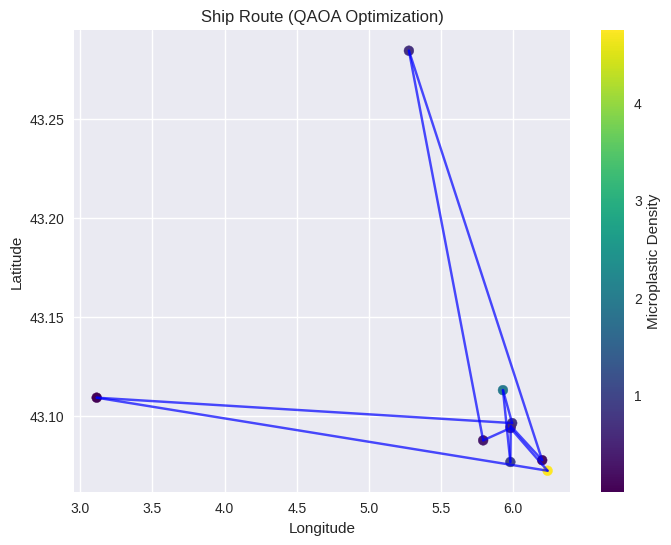

In [ ]:
import pennylane as qml
from pennylane import numpy as np
from pennylane import qaoa
import pandas as pd
from math import radians, cos, sin, asin, sqrt
import matplotlib.pyplot as plt
from google.colab import drive

# Mount Google Drive
drive.mount('/content/drive')

# Load data
try:
    data = pd.read_excel('/content/drive/My Drive/data/first_ten_data.xlsx')
    latitudes = data['Latitude'].values
    longitudes = data['Longitude'].values
    densities = data['Microplastics Measurement (density)'].values
    num_locations = len(latitudes)
except FileNotFoundError:
    print("Error: 'first_ten_data.xlsx' not found.")
    exit()
except KeyError as e:
    print(f"Error: Column not found - {e}")
    exit()

# Haversine distance function
def haversine(lat1, lon1, lat2, lon2):
    lon1, lat1, lon2, lat2 = map(radians, [lon1, lat1, lon2, lat2])
    dlon = lon2 - lon1
    dlat = lat2 - lat1
    a = sin(dlat / 2)**2 + cos(lat1) * cos(lat2) * sin(dlon / 2)**2
    c = 2 * asin(sqrt(a))
    r = 6371  # Radius of earth in kilometers
    return c * r

# Calculate distance matrix
distance_matrix = np.zeros((num_locations, num_locations))
for i in range(num_locations):
    for j in range(i + 1, num_locations):
        distance = haversine(latitudes[i], longitudes[i], latitudes[j], longitudes[j])
        distance_matrix[i, j] = distance_matrix[j, i] = distance

# Define cost and mixer Hamiltonians
cost_H = qml.Hamiltonian(
    [distance_matrix[i, j] for i in range(num_locations) for j in range(i + 1, num_locations)],
    [qml.PauliZ(i) @ qml.PauliZ(j) for i in range(num_locations) for j in range(i + 1, num_locations)]
)

mixer_H = sum(qml.PauliX(i) for i in range(num_locations))

# QAOA setup
wires = range(num_locations)
depth = 1  # Number of QAOA layers (reduced for faster execution)

dev = qml.device("default.qubit", wires=wires)

def qaoa_layer(gamma, alpha):
    qaoa.cost_layer(gamma, cost_H)
    qaoa.mixer_layer(alpha, mixer_H)

def circuit(params):
    for w in wires:
        qml.Hadamard(w)
    qml.layer(qaoa_layer, depth, params[0], params[1])

@qml.qnode(dev)
def cost_function(params):
    circuit(params)
    return qml.expval(cost_H)

# Initialize parameters
init_params = np.random.rand(2, depth)

# Optimize the circuit
optimizer = qml.GradientDescentOptimizer(stepsize=0.4)
steps = 50  # Reduced optimization steps

params = init_params
for i in range(steps):
    params = optimizer.step(cost_function, params)
    if (i + 1) % 10 == 0:
        print(f"Cost after step {i+1}: {cost_function(params)}")

# Placeholder solution - replace with proper decoding
solution = list(range(num_locations))
print(solution)

# Plotting
plt.figure(figsize=(8, 6))
for i in range(num_locations - 1):
    plt.plot([longitudes[solution[i]], longitudes[solution[i+1]]], [latitudes[solution[i]], latitudes[solution[i+1]]], 'b-', alpha=0.7)
plt.plot([longitudes[solution[-1]], longitudes[solution[0]]], [latitudes[solution[-1]], latitudes[solution[0]]], 'b-', alpha=0.7)
plt.scatter(longitudes, latitudes, s=50, c=densities, cmap='viridis')
plt.colorbar(label='Microplastic Density')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('Ship Route (QAOA Optimization)')
plt.show()